In [1]:
!pip install tensorflow_hub tensorflow_datasets

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=9037216f02b13cf63a912cfaa47d7241f63d133cb25a25f4f

In [2]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from tqdm import tqdm

print("\u2022 Using TensorFlow Version:", tf.__version__)
print("\u2022 Using TensorFlow Hub Version: ", hub.__version__)
print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.9.1
• Using TensorFlow Hub Version:  0.16.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
• GPU Device Found.


2024-05-06 13:37:18.128510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 13:37:19.684630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:37:19.698526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:37:19.699135: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [3]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [4]:
(train_examples, validation_examples, test_examples), info = tfds.load('cats_vs_dogs', 
                                                                       with_info=True, 
                                                                       as_supervised=True, 
                                                                       split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'])

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

2024-05-06 13:37:21.073438: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


2024-05-06 13:39:49.444050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:39:49.444367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:39:49.444505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:39:49.444932: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-06 13:39:49.445069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [5]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmpmb2qw0m8tfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [6]:
def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return  image, label

BATCH_SIZE = 32

In [7]:
train_batches = train_examples.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_examples.map(format_image).batch(1)

In [8]:
num_examples, num_classes

(23262, 2)

In [9]:
train_batches

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [10]:
train_examples

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [11]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape

TensorShape([32, 224, 224, 3])

In [12]:
label_batch

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0])>

## Defining the Model

In [13]:
do_fine_tuning = False #@param {type:"boolean"}

In [14]:
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [15]:
IMAGE_SIZE, IMAGE_SIZE+(3,)

((224, 224), (224, 224, 3))

In [16]:
print("Building model with", MODULE_HANDLE)

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

Building model with https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
#@title (Optional) Unfreeze some layers
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
      
if do_fine_tuning:
    feature_extractor.trainable = True
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

else:
    feature_extractor.trainable = False

In [18]:
if do_fine_tuning:
    model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.002, momentum=0.9),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
else:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [19]:
EPOCHS = 5

hist = model.fit(train_batches,
                 epochs=EPOCHS,
                 validation_data=validation_batches)

Epoch 1/5


2024-05-06 13:39:59.482741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


 15/582 [..............................] - ETA: 28s - loss: 0.5004 - accuracy: 0.7625

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 48/582 [=>............................] - ETA: 25s - loss: 0.2243 - accuracy: 0.9076

 58/582 [=>............................] - ETA: 25s - loss: 0.1946 - accuracy: 0.9224

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


129/582 [=====>........................] - ETA: 21s - loss: 0.1274 - accuracy: 0.9528

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


337/582 [================>.............] - ETA: 11s - loss: 0.0774 - accuracy: 0.9715

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


351/582 [=================>............] - ETA: 11s - loss: 0.0756 - accuracy: 0.9720

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


361/582 [=================>............] - ETA: 10s - loss: 0.0748 - accuracy: 0.9726

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


387/582 [==================>...........] - ETA: 9s - loss: 0.0727 - accuracy: 0.9735

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


395/582 [===================>..........] - ETA: 9s - loss: 0.0719 - accuracy: 0.9738

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9785

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 42s 59ms/step - loss: 0.0597 - accuracy: 0.9785 - val_loss: 0.0421 - val_accuracy: 0.9850
Epoch 2/5
 16/582 [..............................] - ETA: 27s - loss: 0.0409 - accuracy: 0.9902

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 48/582 [=>............................] - ETA: 25s - loss: 0.0454 - accuracy: 0.9876

 58/582 [=>............................] - ETA: 25s - loss: 0.0399 - accuracy: 0.9887

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


128/582 [=====>........................] - ETA: 22s - loss: 0.0398 - accuracy: 0.9880

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


338/582 [================>.............] - ETA: 11s - loss: 0.0316 - accuracy: 0.9898

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


351/582 [=================>............] - ETA: 11s - loss: 0.0315 - accuracy: 0.9897

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


361/582 [=================>............] - ETA: 10s - loss: 0.0326 - accuracy: 0.9895

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


387/582 [==================>...........] - ETA: 9s - loss: 0.0321 - accuracy: 0.9898

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


395/582 [===================>..........] - ETA: 9s - loss: 0.0318 - accuracy: 0.9900

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9905

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 32s 55ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0421 - val_accuracy: 0.9837
Epoch 3/5
 15/582 [..............................] - ETA: 27s - loss: 0.0319 - accuracy: 0.9937

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 45/582 [=>............................] - ETA: 26s - loss: 0.0307 - accuracy: 0.9896

 57/582 [=>............................] - ETA: 25s - loss: 0.0325 - accuracy: 0.9896

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


127/582 [=====>........................] - ETA: 22s - loss: 0.0275 - accuracy: 0.9909

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


336/582 [================>.............] - ETA: 12s - loss: 0.0286 - accuracy: 0.9904

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


349/582 [================>.............] - ETA: 11s - loss: 0.0297 - accuracy: 0.9903

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


359/582 [=================>............] - ETA: 10s - loss: 0.0292 - accuracy: 0.9905

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


386/582 [==================>...........] - ETA: 9s - loss: 0.0286 - accuracy: 0.9906

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


394/582 [===================>..........] - ETA: 9s - loss: 0.0285 - accuracy: 0.9906

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9915

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 33s 55ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.0426 - val_accuracy: 0.9862
Epoch 4/5
 15/582 [..............................] - ETA: 27s - loss: 0.0180 - accuracy: 0.9937

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 47/582 [=>............................] - ETA: 26s - loss: 0.0343 - accuracy: 0.9874

 57/582 [=>............................] - ETA: 25s - loss: 0.0342 - accuracy: 0.9879

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


129/582 [=====>........................] - ETA: 22s - loss: 0.0286 - accuracy: 0.9893

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


337/582 [================>.............] - ETA: 12s - loss: 0.0259 - accuracy: 0.9911

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


350/582 [=================>............] - ETA: 11s - loss: 0.0254 - accuracy: 0.9912

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


361/582 [=================>............] - ETA: 10s - loss: 0.0252 - accuracy: 0.9913

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


387/582 [==================>...........] - ETA: 9s - loss: 0.0243 - accuracy: 0.9915

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


395/582 [===================>..........] - ETA: 9s - loss: 0.0249 - accuracy: 0.9914

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.0228 - accuracy: 0.9921

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 33s 55ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0424 - val_accuracy: 0.9871
Epoch 5/5
 16/582 [..............................] - ETA: 27s - loss: 0.0324 - accuracy: 0.9844

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


 47/582 [=>............................] - ETA: 26s - loss: 0.0198 - accuracy: 0.9920

 57/582 [=>............................] - ETA: 25s - loss: 0.0236 - accuracy: 0.9918

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


130/582 [=====>........................] - ETA: 22s - loss: 0.0262 - accuracy: 0.9913

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


337/582 [================>.............] - ETA: 12s - loss: 0.0222 - accuracy: 0.9924

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


350/582 [=================>............] - ETA: 11s - loss: 0.0216 - accuracy: 0.9926

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


360/582 [=================>............] - ETA: 10s - loss: 0.0212 - accuracy: 0.9928

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


388/582 [===================>..........] - ETA: 9s - loss: 0.0213 - accuracy: 0.9928

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


394/582 [===================>..........] - ETA: 9s - loss: 0.0213 - accuracy: 0.9928

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9930

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 33s 55ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.0441 - val_accuracy: 0.9862


## Export model

In [25]:
CATS_VS_DOGS_SAVED_MODEL = "exp_saved_model"

In [26]:
tf.saved_model.save(model, CATS_VS_DOGS_SAVED_MODEL)

INFO:tensorflow:Assets written to: exp_saved_model/assets


INFO:tensorflow:Assets written to: exp_saved_model/assets


In [27]:
%%bash -s $CATS_VS_DOGS_SAVED_MODEL

saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['keras_layer_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 224, 224, 3)
      name: serving_default_keras_layer_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 2)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [28]:
loaded = tf.saved_model.load(CATS_VS_DOGS_SAVED_MODEL)

In [30]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'keras_layer_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_layer_input')})
{'dense': TensorSpec(shape=(None, 2), dtype=tf.float32, name='dense')}


## Convert to tflite converter

In [31]:
converter = tf.lite.TFLiteConverter.from_saved_model(CATS_VS_DOGS_SAVED_MODEL)

### Post-Training Quantization
The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. This technique is enabled as an option in the TensorFlow Lite converter. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [32]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

### Post-Training Integer Quantization
We can get further latency improvements, reductions in peak memory usage, and access to integer only hardware accelerators by making sure all model math is quantized. To do this, we need to measure the dynamic range of activations and inputs with a representative data set. You can simply create an input data generator and provide it to our converter.

In [33]:
def representative_data_gen():
    for input_value, _ in test_batches.take(100):
        yield [input_value]

In [34]:
converter.representative_dataset = representative_data_gen

### Full Integer Quantization

To require the converter to only output integer operations, one can specify:

In [35]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

### Convert the model

In [36]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

2024-05-06 14:01:26.654193: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-05-06 14:01:26.654227: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-05-06 14:01:26.654726: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: exp_saved_model
2024-05-06 14:01:26.663752: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2024-05-06 14:01:26.663773: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: exp_saved_model
2024-05-06 14:01:26.689325: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2024-05-06 14:01:26.698494: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2024-05-06 14:01:26.996720: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: exp_saved_model
2024-05-06

In [37]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [38]:
# Gather results for the randomly sampled test images
predictions = []

test_labels, test_imgs = [], []
for img, label in tqdm(test_batches.take(10)):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 16.88it/s]


In [39]:
#@title Utility functions for plotting
# Utilities for plotting

class_names = ['cat', 'dog']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)

    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

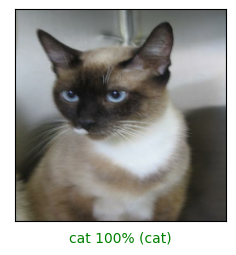

In [40]:
#@title Visualize the outputs { run: "auto" }
index = 0 #@param {type:"slider", min:0, max:9, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_imgs)
plt.show()

In [41]:
labels = ['cat', 'dog']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))